In [ ]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/Guvi/MDTM39/projects/miniproject2/ICRISAT-District Level Data - ICRISAT-District Level Data.csv')

conn = sqlite3.connect("/content/drive/MyDrive/Guvi/MDTM39/projects/miniproject2/ICRISAT-District Level Data - ICRISAT-District Level Data.db")
cursor = conn.cursor()


In [32]:
# Drop table if already exists (to avoid duplicates)
cursor.execute("DROP TABLE IF EXISTS agriculture_data")

In [4]:
df.replace(-1, 0)

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548.00,185.00,337.59,44.00,20.00,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.00,409.00,747.71,50.00,26.00,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.30,468.00,841.27,53.70,30.00,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.40,400.80,711.40,49.40,26.50,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.60,473.60,828.55,44.20,29.00,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16141,917,2013,15,Jharkhand,Singhbhum,267.06,579.70,2170.67,1.53,1.85,...,0.00,0.0,0.0,0.0,0.00,9.02,9.03,0.48,0.08,0.00
16142,917,2014,15,Jharkhand,Singhbhum,256.33,586.63,2288.57,5.36,6.65,...,0.00,0.0,0.0,0.0,0.00,8.63,8.64,0.46,0.04,0.00
16143,917,2015,15,Jharkhand,Singhbhum,263.21,264.71,1005.70,1.99,1.82,...,0.00,0.0,0.0,0.0,0.00,6.84,6.85,0.42,0.01,0.00
16144,917,2016,15,Jharkhand,Singhbhum,224.05,319.01,1423.84,0.38,0.83,...,0.00,0.0,0.0,0.0,0.03,6.40,6.43,0.03,0.01,0.00


In [5]:
df.columns

Index(['Dist Code', 'Year', 'State Code', 'State Name', 'Dist Name',
       'RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)',
       'RICE YIELD (Kg per ha)', 'WHEAT AREA (1000 ha)',
       'WHEAT PRODUCTION (1000 tons)', 'WHEAT YIELD (Kg per ha)',
       'KHARIF SORGHUM AREA (1000 ha)',
       'KHARIF SORGHUM PRODUCTION (1000 tons)',
       'KHARIF SORGHUM YIELD (Kg per ha)', 'RABI SORGHUM AREA (1000 ha)',
       'RABI SORGHUM PRODUCTION (1000 tons)', 'RABI SORGHUM YIELD (Kg per ha)',
       'SORGHUM AREA (1000 ha)', 'SORGHUM PRODUCTION (1000 tons)',
       'SORGHUM YIELD (Kg per ha)', 'PEARL MILLET AREA (1000 ha)',
       'PEARL MILLET PRODUCTION (1000 tons)', 'PEARL MILLET YIELD (Kg per ha)',
       'MAIZE AREA (1000 ha)', 'MAIZE PRODUCTION (1000 tons)',
       'MAIZE YIELD (Kg per ha)', 'FINGER MILLET AREA (1000 ha)',
       'FINGER MILLET PRODUCTION (1000 tons)',
       'FINGER MILLET YIELD (Kg per ha)', 'BARLEY AREA (1000 ha)',
       'BARLEY PRODUCTION (1000 tons)', 'BARLEY 

In [36]:
# Create table (Ensure column names match CSV)
cursor.execute("""
    CREATE TABLE agriculture_data (
        Dist_Code INTEGER,
        Year INTEGER,
        State_Code INTEGER,
        State_Name VARCHAR,
        Dist_Name VARCHAR,
        RICE_AREA_1000_ha REAL,
        RICE_PRODUCTION_1000_tons REAL,
        RICE_YIELD_Kg_per_ha REAL,
        WHEAT_AREA_1000_ha REAL,
        WHEAT_PRODUCTION_1000_tons REAL,
        WHEAT_YIELD_Kg_per_ha REAL,
        KHARIF_SORGHUM_AREA_1000_ha REAL,
        KHARIF_SORGHUM_PRODUCTION_1000_tons REAL,
        KHARIF_SORGHUM_YIELD_Kg_per_ha REAL,
        RABI_SORGHUM_AREA_1000_ha REAL,
        RABI_SORGHUM_PRODUCTION_1000_tons REAL,
        RABI_SORGHUM_YIELD_Kg_per_ha REAL,
        SORGHUM_AREA_1000_ha REAL,
        SORGHUM_PRODUCTION_1000_tons REAL,
        SORGHUM_YIELD_Kg_per_ha REAL,
        PEARL_MILLET_AREA_1000_ha REAL,
        PEARL_MILLET_PRODUCTION_1000_tons REAL,
        PEARL_MILLET_YIELD_Kg_per_ha REAL,
        MAIZE_AREA_1000_ha REAL,
        MAIZE_PRODUCTION_1000_tons REAL,
        MAIZE_YIELD_Kg_per_ha REAL,
        FINGER_MILLET_AREA_1000_ha REAL,
        FINGER_MILLET_PRODUCTION_1000_tons REAL,
        FINGER_MILLET_YIELD_Kg_per_ha REAL,
        BARLEY_AREA_1000_ha REAL,
        BARLEY_PRODUCTION_1000_tons REAL,
        BARLEY_YIELD_Kg_per_ha REAL,
        CHICKPEA_AREA_1000_ha REAL,
        CHICKPEA_PRODUCTION_1000_tons REAL,
        CHICKPEA_YIELD_Kg_per_ha REAL,
        PIGEONPEA_AREA_1000_ha REAL,
        PIGEONPEA_PRODUCTION_1000_tons REAL,
        PIGEONPEA_YIELD_Kg_per_ha REAL,
        MINOR_PULSES_AREA_1000_ha REAL,
        MINOR_PULSES_PRODUCTION_1000_tons REAL,
        MINOR_PULSES_YIELD_Kg_per_ha REAL,
        GROUNDNUT_AREA_1000_ha REAL,
        GROUNDNUT_PRODUCTION_1000_tons REAL,
        GROUNDNUT_YIELD_Kg_per_ha REAL,
        SESAMUM_AREA_1000_ha REAL,
        SESAMUM_PRODUCTION_1000_tons REAL,
        SESAMUM_YIELD_Kg_per_ha REAL,
        RAPESEED_AND_MUSTARD_AREA_1000_ha REAL,
        RAPESEED_AND_MUSTARD_PRODUCTION_1000_tons REAL,
        RAPESEED_AND_MUSTARD_YIELD_Kg_per_ha REAL,
        SAFFLOWER_AREA_1000_ha REAL,
        SAFFLOWER_PRODUCTION_1000_tons REAL,
        SAFFLOWER_YIELD_Kg_per_ha REAL,
        CASTOR_AREA_1000_ha REAL,
        CASTOR_PRODUCTION_1000_tons REAL,
        CASTOR_YIELD_Kg_per_ha REAL,
        LINSEED_AREA_1000_ha REAL,
        LINSEED_PRODUCTION_1000_tons REAL,
        LINSEED_YIELD_Kg_per_ha REAL,
        SUNFLOWER_AREA_1000_ha REAL,
        SUNFLOWER_PRODUCTION_1000_tons REAL,
        SUNFLOWER_YIELD_Kg_per_ha REAL,
        SOYABEAN_AREA_1000_ha REAL,
        SOYABEAN_PRODUCTION_1000_tons REAL,
        SOYABEAN_YIELD_Kg_per_ha REAL,
        OILSEEDS_AREA_1000_ha REAL,
        OILSEEDS_PRODUCTION_1000_tons REAL,
        OILSEEDS_YIELD_Kg_per_ha REAL,
        SUGARCANE_AREA_1000_ha REAL,
        SUGARCANE_PRODUCTION_1000 tons REAL,
        SUGARCANE_YIELD_Kg_per_ha REAL,
        COTTON_AREA_1000_ha REAL,
        COTTON_PRODUCTION_1000_tons REAL,
        COTTON_YIELD_Kg_per_ha REAL,
        FRUITS_AREA_1000_ha REAL,
        VEGETABLES_AREA_1000_ha REAL,
        FRUITS_AND_VEGETABLES_AREA_1000_ha REAL,
        POTATOES_AREA_1000_ha REAL,
        ONION_AREA_1000_ha REAL,
        FODDER_AREA_1000_ha REAL

    )
""")

# Rename columns to remove parentheses and spaces
df.columns = df.columns.str.replace(r"[()]", "", regex=True).str.replace(" ", "_")
# data is inserted from the DataFrame into the SQLite table
df.to_sql('agriculture_data', conn, if_exists='replace', index=False)
df.replace(-1, 0, inplace=True)
conn.commit()


   State_Code  Total_Rice_Production
0          13              544232.26
1          12              445597.62
2           9              335040.10
3           1              315185.40
4          11              291201.51


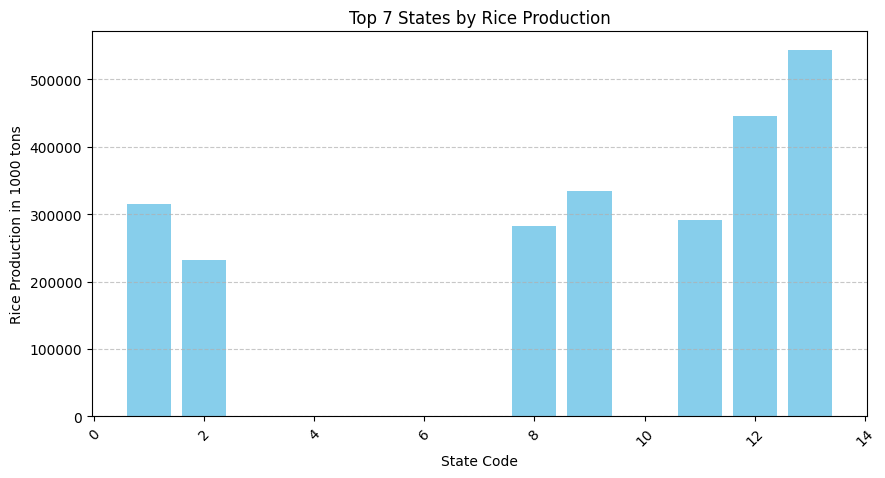

In [37]:
query = """
    SELECT State_Code, SUM(RICE_PRODUCTION_1000_tons) AS Total_Rice_Production
    FROM agriculture_data
    GROUP BY State_Code
    ORDER BY Total_Rice_Production DESC
    LIMIT 7;
"""
top_7_states = pd.read_sql(query, conn)



# Ensure Data is Fetched Correctly
print(top_7_states.head())  # Check if State_Code and Total_Rice_Production exist

# Plot Bar Chart for Top 7 States
plt.figure(figsize=(10, 5))
plt.bar(top_7_states["State_Code"], top_7_states["Total_Rice_Production"], color='skyblue')
plt.xlabel("State Code")
plt.ylabel("Rice Production in 1000 tons")
plt.title("Top 7 States by Rice Production")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

       State_Name  Total_Wheat_Production
0   Uttar Pradesh               970210.07
1          Punjab               593848.90
2         Haryana               348429.60
3  Madhya Pradesh               338644.25
4       Rajasthan               265994.99
Number of states retrieved: 5


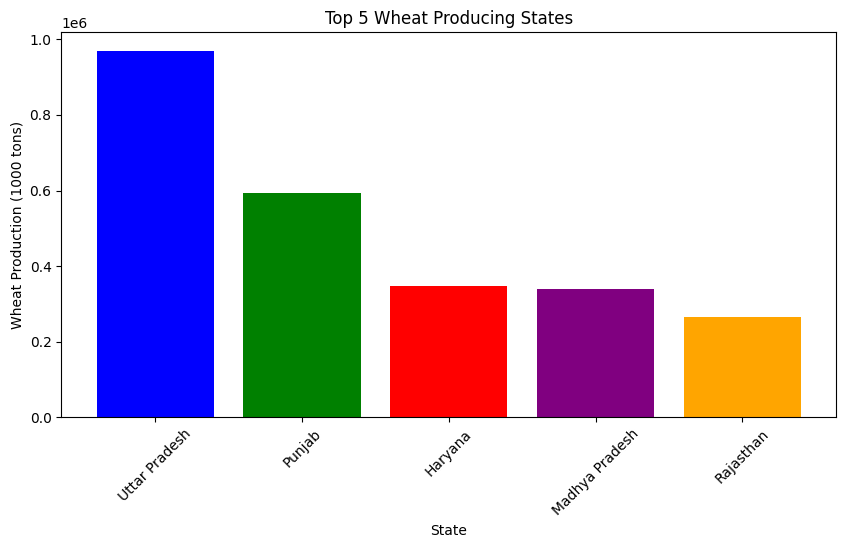

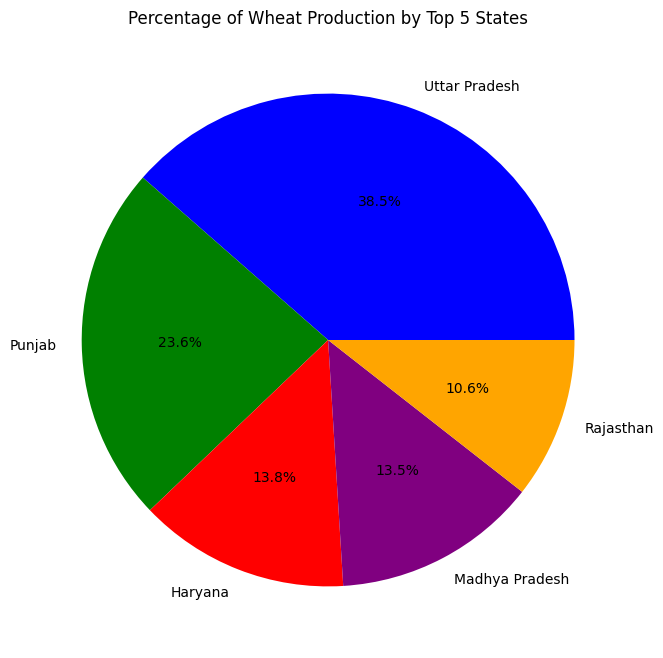

In [7]:
#Top 5 Wheat Producing States Data(Bar_chart)and its percentage(%)(Pie_chart)

query1 = """
SELECT TRIM(State_Name) AS State_Name,
       SUM(WHEAT_PRODUCTION_1000_tons) AS Total_Wheat_Production
FROM agriculture_data
WHERE State_Name IS NOT NULL  -- Ensure no NULL values
GROUP BY TRIM(State_Name)
ORDER BY Total_Wheat_Production DESC
LIMIT 5;
"""
top_5_state = pd.read_sql_query(query1, conn)

# Debugging: Print DataFrame to verify results
print(top_5_state)
print("Number of states retrieved:", len(top_5_state))  # Should be exactly 5

# Bar Chart (Top 5 Only)
plt.figure(figsize=(10, 5))
plt.bar(top_5_state["State_Name"], top_5_state["Total_Wheat_Production"], color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel("State")
plt.ylabel("Wheat Production (1000 tons)")
plt.title("Top 5 Wheat Producing States")
plt.xticks(rotation=45)
plt.show()

# Pie Chart (Top 5 Only)
plt.figure(figsize=(8, 8))
plt.pie(top_5_state["Total_Wheat_Production"], labels=top_5_state["State_Name"], autopct="%1.1f%%", colors=['blue', 'green', 'red', 'purple', 'orange'])
plt.title("Percentage of Wheat Production by Top 5 States")
plt.show()

       State_Name  Total_Oilseed_Production
0  Madhya Pradesh                 153594.79
1         Gujarat                 126224.01
2       Rajasthan                 122726.86
3     Maharashtra                  95567.91
4  Andhra Pradesh                  76888.09
Number of states retrieved: 5


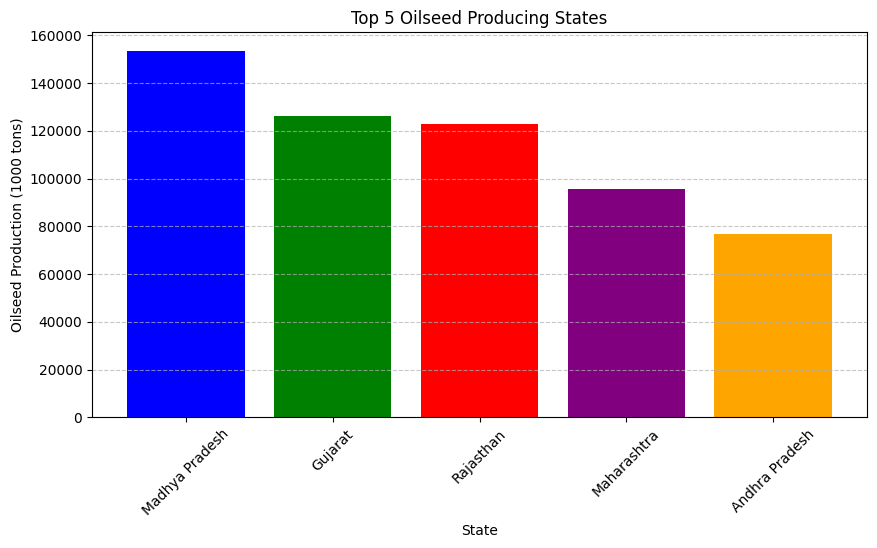

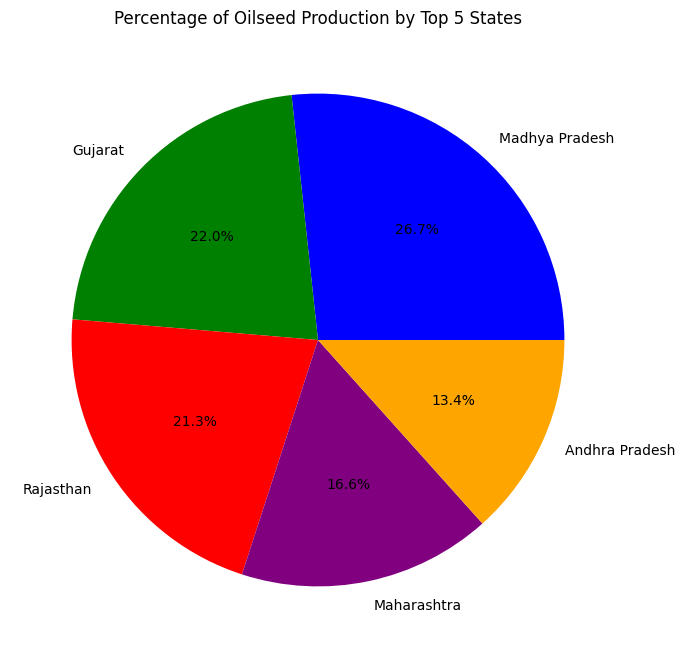

In [8]:
#Oil seed production by top 5 states
query = """
SELECT TRIM(State_Name) AS State_Name,
       SUM(OILSEEDS_PRODUCTION_1000_tons) AS Total_Oilseed_Production
FROM agriculture_data
WHERE State_Name IS NOT NULL  -- Ensure no NULL values
GROUP BY TRIM(State_Name)
ORDER BY Total_Oilseed_Production DESC
LIMIT 5;
"""
df_oilseed = pd.read_sql_query(query, conn)


#(Check the fetched data)
print(df_oilseed)
print("Number of states retrieved:", len(df_oilseed))  # Should be exactly 5

# Bar Chart (Top 5 Only)
plt.figure(figsize=(10, 5))
plt.bar(df_oilseed["State_Name"], df_oilseed["Total_Oilseed_Production"], color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel("State")
plt.ylabel("Oilseed Production (1000 tons)")
plt.title("Top 5 Oilseed Producing States")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Pie Chart (Percentage Contribution by Top 5 States)
plt.figure(figsize=(8, 8))
plt.pie(df_oilseed["Total_Oilseed_Production"], labels=df_oilseed["State_Name"], autopct="%1.1f%%", colors=['blue', 'green', 'red', 'purple', 'orange'])
plt.title("Percentage of Oilseed Production by Top 5 States")
plt.show()


       State_Name  Total_Sunflower_Production
0       Karnataka                    10785.87
1     Maharashtra                     5599.46
2  Andhra Pradesh                     4447.78
3       Telangana                     1401.06
4          Punjab                     1081.86
5      Tamil Nadu                      762.38
6   Uttar Pradesh                      552.66
Number of states retrieved: 7


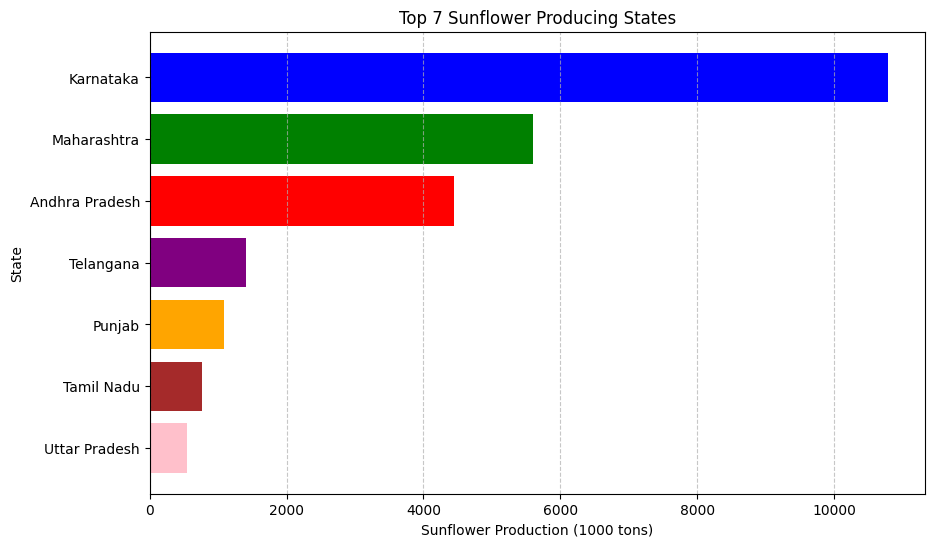

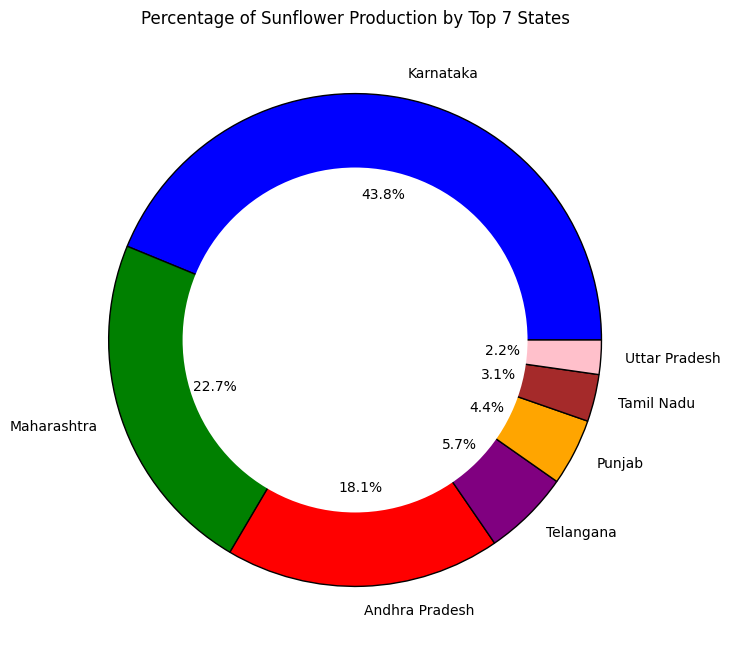

In [9]:
#Top 7 SUNFLOWER PRODUCTION  State
query = """
SELECT TRIM(State_Name) AS State_Name,
       SUM(SUNFLOWER_PRODUCTION_1000_tons) AS Total_Sunflower_Production
FROM agriculture_data
WHERE State_Name IS NOT NULL  -- Ensure no NULL values
GROUP BY TRIM(State_Name)
ORDER BY Total_Sunflower_Production DESC
LIMIT 7;
"""
df_sunflower = pd.read_sql_query(query, conn)

#(Check the fetched data)
print(df_sunflower)
print("Number of states retrieved:", len(df_sunflower))  # Should be exactly 7

#Horizontal Bar Chart**
plt.figure(figsize=(10, 6))
plt.barh(df_sunflower["State_Name"], df_sunflower["Total_Sunflower_Production"], color=['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink'])
plt.xlabel("Sunflower Production (1000 tons)")
plt.ylabel("State")
plt.title("Top 7 Sunflower Producing States")
plt.gca().invert_yaxis()  # Invert Y-axis to show highest production on top
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Donut Chart**
plt.figure(figsize=(8, 8))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink']
plt.pie(df_sunflower["Total_Sunflower_Production"], labels=df_sunflower["State_Name"], autopct="%1.1f%%", colors=colors, wedgeprops={'edgecolor': 'black'})
# Draw center circle to create donut shape
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)
plt.title("Percentage of Sunflower Production by Top 7 States")
plt.show()

    Year  Total_Sugarcane_Production
0   1975                    14931.26
1   1976                    15480.12
2   1977                    18136.92
3   1978                    15610.47
4   1979                    12689.56
5   1980                    15153.07
6   1981                    18017.94
7   1982                    18617.78
8   1983                    17344.32
9   1984                    17009.60
10  1985                    16843.80
11  1986                    17952.70
12  1987                    19262.10
13  1988                    20234.53
14  1989                    22000.56
15  1990                    24073.07
16  1991                    25666.70
17  1992                    23642.98
18  1993                    24187.27
19  1994                    28496.59
20  1995                    29164.69
21  1996                    27444.29
22  1997                    27612.42
23  1998                    29533.07
24  1999                    30489.42
25  2000                    30147.27
2

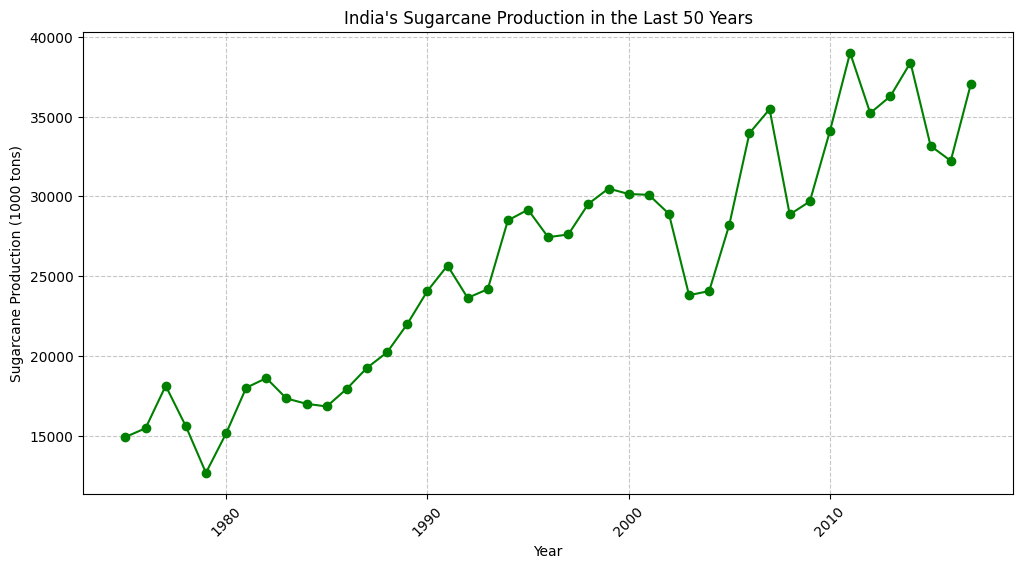

In [10]:
#India's SUGARCANE PRODUCTION From Last 50 Years(Line_plot)

query = """
SELECT Year,
       SUM(SUGARCANE_PRODUCTION_1000_tons) AS Total_Sugarcane_Production
FROM agriculture_data
WHERE Year >= strftime('%Y', 'now') - 50  -- Last 50 years
GROUP BY Year
ORDER BY Year ASC;
"""
df_sugarcane = pd.read_sql_query(query, conn)


# (Check the fetched data)
print(df_sugarcane)
total_sugarcane_production = df_sugarcane["Total_Sugarcane_Production"].sum()
print(f"Total Sugarcane production in last 50 years: {total_sugarcane_production} tons")

# Line Plot for Last 50 Years**
plt.figure(figsize=(12, 6))
plt.plot(df_sugarcane["Year"], df_sugarcane["Total_Sugarcane_Production"], marker='o', linestyle='-', color='green', label="Sugarcane Production")
plt.xlabel("Year")
plt.ylabel("Sugarcane Production (1000 tons)")
plt.title("India's Sugarcane Production in the Last 50 Years")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)


    Year  Total_Rice_Production  Total_Wheat_Production
0   1975               46144.36                27150.41
1   1976               40226.45                27580.73
2   1977               50439.41                30003.66
3   1978               50868.02                34078.29
4   1979               40560.64                30742.00
5   1980               52796.25                35659.06
6   1981               52486.37                37154.29
7   1982               45081.34                42402.18
8   1983               57766.50                44859.22
9   1984               56451.83                43846.97
10  1985               62289.85                46811.09
11  1986               58592.01                43499.94
12  1987               54890.34                45504.65
13  1988               68923.09                53682.89
14  1989               73530.86                52123.31
15  1990               71613.37                54449.14
16  1991               71858.31                5

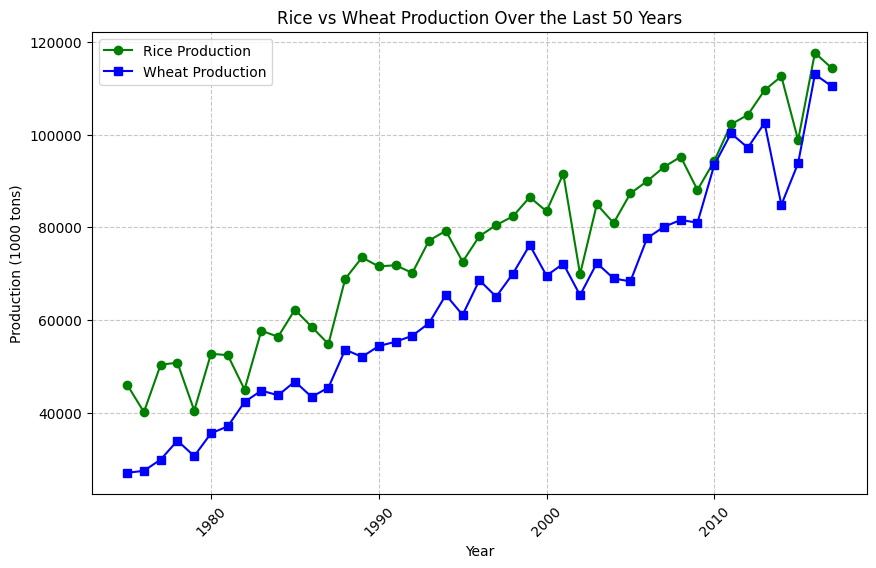

In [11]:
#Rice Production Vs Wheat Production (Last 50y)

query = """
SELECT Year,
       SUM(RICE_PRODUCTION_1000_tons) AS Total_Rice_Production,
       SUM(WHEAT_PRODUCTION_1000_tons) AS Total_Wheat_Production
FROM agriculture_data
WHERE Year >= strftime('%Y', 'now') - 50  -- Last 50 years
GROUP BY Year
ORDER BY Year ASC;
"""
df_production = pd.read_sql_query(query, conn)

# (Check the fetched data)
print(df_production)
total_rice_production = df_production["Total_Rice_Production"].sum()
print(f"Total rice production in last 50 years: {total_rice_production} tons")


plt.figure(figsize=(10, 6))
plt.plot(df_production["Year"], df_production["Total_Rice_Production"], marker='o', linestyle='-', color='green', label="Rice Production")
plt.plot(df_production["Year"], df_production["Total_Wheat_Production"], marker='s', linestyle='-', color='blue', label="Wheat Production")

plt.xlabel("Year")
plt.ylabel("Production (1000 tons)")
plt.title("Rice vs Wheat Production Over the Last 50 Years")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()

plt.show()



        Dist_Name  Total_Rice_Production
0        Midnapur               98868.28
1         Burdwan               71422.15
2     24 Parganas               63011.99
3         Birbhum               42213.81
4         Bankura               40165.20
5     Murshidabad               37261.24
6   West Dinajpur               35224.87
7         Hooghly               30962.21
8           Nadia               28016.30
9         Purulia               23147.50
10          Malda               22497.83
11    Cooch Behar               20949.15
12     Jalpaiguri               17372.00
13         Howrah               10264.53
14     Darjeeling                2855.20
Total rice production by West Bengal Districts: 544232.26 tons


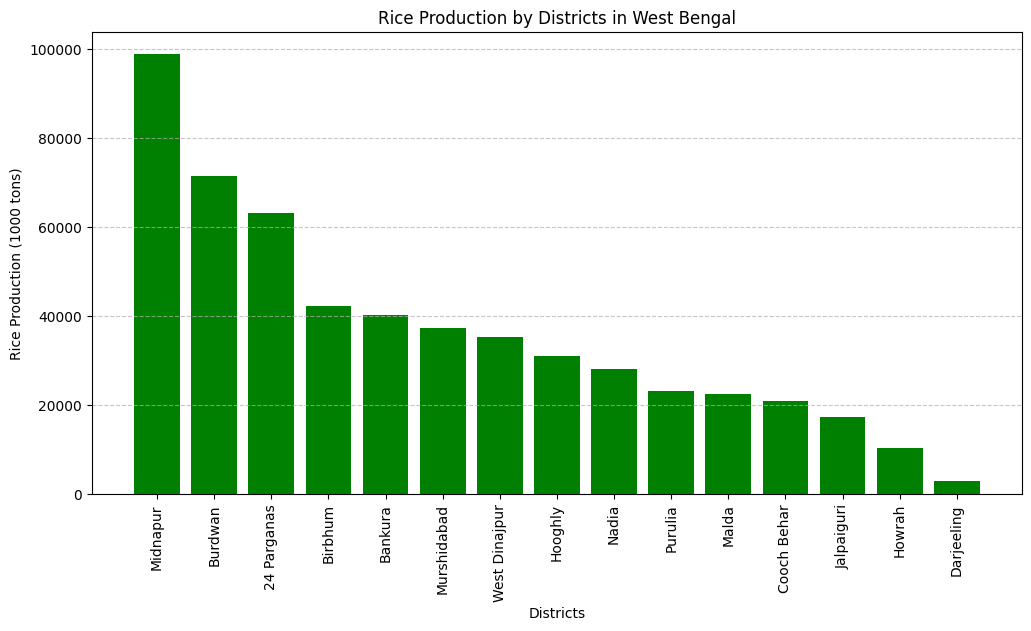

In [12]:
#Rice Production By West Bengal Districts

query = """
SELECT "Dist_Name",
       SUM(RICE_PRODUCTION_1000_tons) AS Total_Rice_Production
FROM agriculture_data
WHERE State_Name = 'West Bengal'
GROUP BY "Dist_Name"
ORDER BY Total_Rice_Production DESC
"""
df_wb_rice = pd.read_sql_query(query, conn)
print(df_wb_rice)
total_rice_production = df_wb_rice["Total_Rice_Production"].sum()
print(f"Total rice production by West Bengal Districts: {total_rice_production} tons")


# Plot Bar Chart
plt.figure(figsize=(12, 6))
plt.bar(df_wb_rice["Dist_Name"], df_wb_rice["Total_Rice_Production"], color='green')
plt.xlabel("Districts")
plt.ylabel("Rice Production (1000 tons)")
plt.title("Rice Production by Districts in West Bengal")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the Plot
plt.show()

   Year  Total_Wheat_Production
0  2017                35798.60
1  2016                35120.90
2  2011                32271.69
3  2013                31611.63
4  2010                30602.91
5  2008                29110.93
6  2012                29041.28
7  2009                27910.80
8  2015                27010.39
9  2003                26445.45
Total rice production by Uttar Pradesh Districts: 304924.58 tons


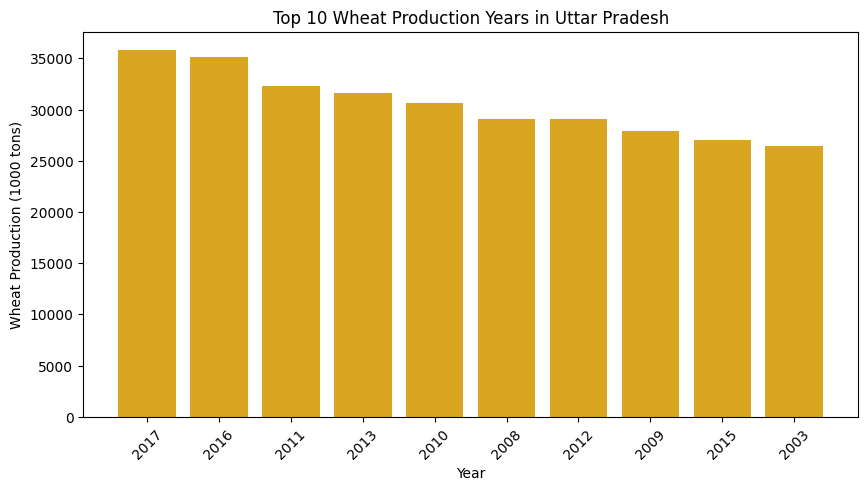

In [13]:
#Top 10 Wheat Production Years From UP

query = """
    SELECT Year,
           SUM(WHEAT_PRODUCTION_1000_tons) AS Total_Wheat_Production
    FROM agriculture_data
    WHERE State_Name = 'Uttar Pradesh'
    GROUP BY Year
    ORDER BY Total_Wheat_Production DESC
    LIMIT 10;
"""

# Fetch Data
df_wheat = pd.read_sql_query(query, conn)
print(df_wheat)
total_rice_production = df_wheat["Total_Wheat_Production"].sum()
print(f"Total rice production by Uttar Pradesh Districts: {total_rice_production} tons")

# Plot the Data (Bar Chart)
plt.figure(figsize=(10, 5))
plt.bar(df_wheat["Year"].astype(str), df_wheat["Total_Wheat_Production"], color='goldenrod')
plt.xlabel("Year")
plt.ylabel("Wheat Production (1000 tons)")
plt.title("Top 10 Wheat Production Years in Uttar Pradesh")
plt.xticks(rotation=45)
plt.show()

    Year  Total_Millet_Production
0   1975                  5625.08
1   1976                  5631.29
2   1977                  4722.99
3   1978                  5510.36
4   1979                  4535.74
5   1980                  5363.72
6   1981                  5360.47
7   1982                  5110.52
8   1983                  7603.26
9   1984                  6151.85
10  1985                  3664.26
11  1986                  4461.36
12  1987                  3355.98
13  1988                  7671.55
14  1989                  6730.73
15  1990                  6998.45
16  1991                  4665.81
17  1992                  9082.92
18  1993                  5197.32
19  1994                  7215.85
20  1995                  5477.49
21  1996                  7872.34
22  1997                  7719.64
23  1998                  7097.60
24  1999                  5900.35
25  2000                  6903.59
26  2001                  8509.41
27  2002                  4953.81
28  2003      

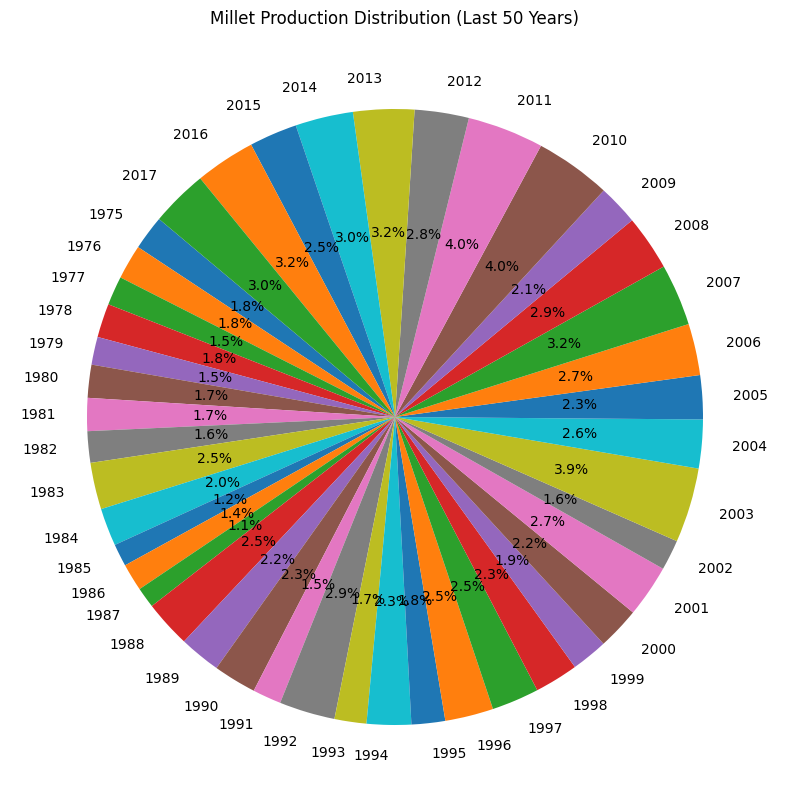

In [14]:
#Millet Production (Last 50y)
# SQL Query
query = """
SELECT Year,
       SUM(PEARL_MILLET_PRODUCTION_1000_tons) AS Total_Millet_Production
FROM agriculture_data
WHERE Year >= (SELECT strftime('%Y', 'now') - 50)  -- Fetch only last 50 years
GROUP BY Year
ORDER BY Year ASC
"""

# Fetch Data
df_millet = pd.read_sql_query(query, conn)
print(df_millet)
total_rice_production = df_millet["Total_Millet_Production"].sum()
print(f"Total rice production in last 50 years: {total_rice_production} tons")


# Pie Chart
plt.figure(figsize=(10, 10))
plt.pie(df_millet["Total_Millet_Production"], labels=df_millet["Year"], autopct="%1.1f%%", startangle=140)
plt.title("Millet Production Distribution (Last 50 Years)")
plt.show()

          State_Name  Kharif_Production  Rabi_Production  \
0        Maharashtra          116655.48         85454.84   
1          Karnataka           35279.76         42753.83   
2     Madhya Pradesh           56642.83           116.69   
3          Telangana           13837.10         11949.33   
4         Tamil Nadu           18108.40          5532.34   
5      Uttar Pradesh           18346.30             0.00   
6     Andhra Pradesh            6195.47         11386.80   
7          Rajasthan           16850.58             0.00   
8            Gujarat           11373.12          4333.60   
9            Haryana            1726.00             0.00   
10            Orissa             713.50             0.00   
11      Chhattisgarh             464.22            27.30   
12             Bihar             125.48             0.00   
13            Kerala              53.90             0.00   
14            Punjab              51.30             0.00   
15         Jharkhand              14.54 

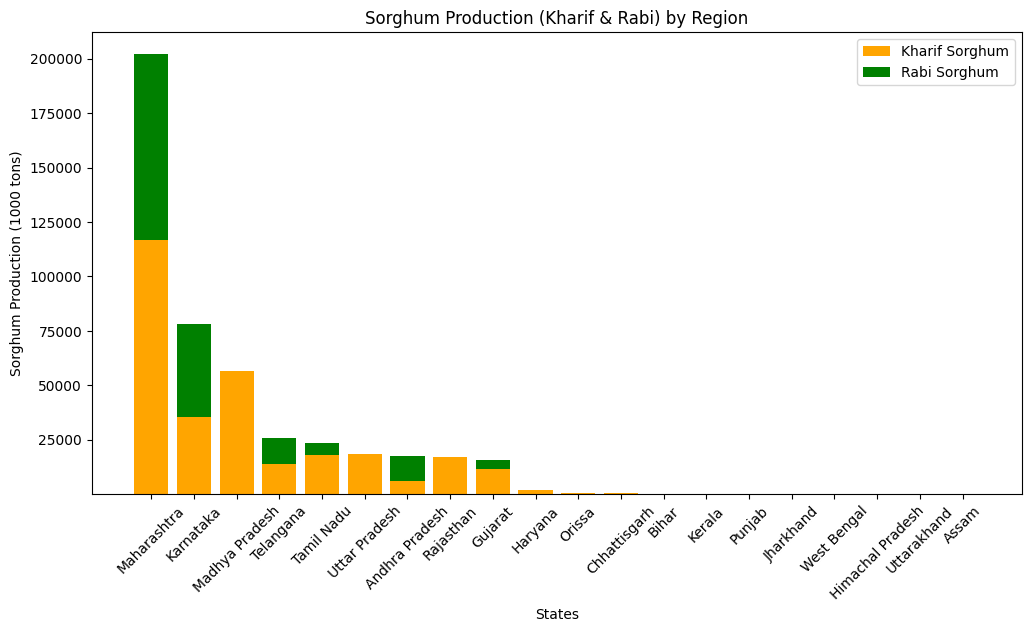

In [38]:
#Sorghum Production (Kharif and Rabi) by Region
import numpy as np

query = """
    SELECT State_Name,
           SUM(KHARIF_SORGHUM_PRODUCTION_1000_tons) AS Kharif_Production,
           SUM(RABI_SORGHUM_PRODUCTION_1000_tons) AS Rabi_Production,
           SUM(SORGHUM_PRODUCTION_1000_tons) AS Total_Sorghum_Production
    FROM agriculture_data
    GROUP BY State_Name
    ORDER BY Total_Sorghum_Production DESC;
"""

# Fetch Data
df_sorghum = pd.read_sql_query(query, conn)
print(df_sorghum)
# Calculate Overall Sorghum Production
total_sorghum = df_sorghum["Total_Sorghum_Production"].sum()
print(f"Total Sorghum Production (Kharif + Rabi) across all regions: {total_sorghum} tons")

# Stacked Bar Chart for Kharif & Rabi Sorghum Production
plt.figure(figsize=(12, 6))
bar_width = 0.6
indices = np.arange(len(df_sorghum))

plt.bar(indices, df_sorghum["Kharif_Production"], color="orange", label="Kharif Sorghum")
plt.bar(indices, df_sorghum["Rabi_Production"], color="green", bottom=df_sorghum["Kharif_Production"], label="Rabi Sorghum")

plt.xticks(indices, df_sorghum["State_Name"], rotation=45)
plt.xlabel("States")
plt.ylabel("Sorghum Production (1000 tons)")
plt.title("Sorghum Production (Kharif & Rabi) by Region")
plt.legend()
plt.show()

In [39]:
query = """
    SELECT State_Name,
           KHARIF_SORGHUM_PRODUCTION_1000_tons,
           RABI_SORGHUM_PRODUCTION_1000_tons,
           SORGHUM_PRODUCTION_1000_tons
    FROM agriculture_data
    where State_Name=='Himachal Pradesh'
"""

# Fetch Data
df_sor = pd.read_sql_query(query, conn)
print(df_sor)


           State_Name  KHARIF_SORGHUM_PRODUCTION_1000_tons  \
0    Himachal Pradesh                                  0.0   
1    Himachal Pradesh                                  0.0   
2    Himachal Pradesh                                  0.0   
3    Himachal Pradesh                                  0.0   
4    Himachal Pradesh                                  0.0   
..                ...                                  ...   
515  Himachal Pradesh                                  0.0   
516  Himachal Pradesh                                  0.0   
517  Himachal Pradesh                                  0.0   
518  Himachal Pradesh                                  0.0   
519  Himachal Pradesh                                  0.0   

     RABI_SORGHUM_PRODUCTION_1000_tons  SORGHUM_PRODUCTION_1000_tons  
0                                  0.0                           0.0  
1                                  0.0                           0.0  
2                                  0.0    

       State_Name  Total_Groundnut_Production
0         Gujarat                    98321.42
1  Andhra Pradesh                    57844.81
2      Tamil Nadu                    57662.42
3       Karnataka                    36033.05
4     Maharashtra                    29002.06
5       Rajasthan                    17354.29
6          Orissa                    16857.48


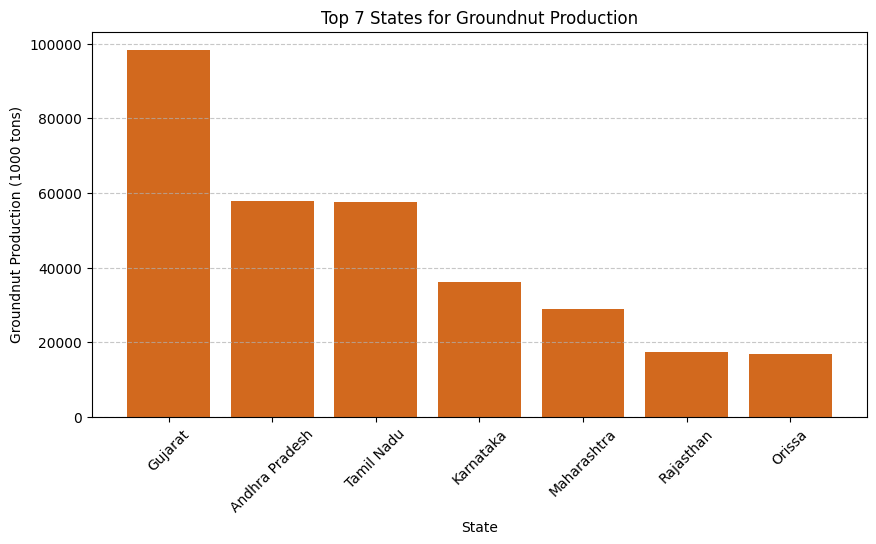

In [40]:
#Top 7 States for Groundnut Production


query = """
    SELECT State_Name,
           SUM(GROUNDNUT_PRODUCTION_1000_tons) AS Total_Groundnut_Production
    FROM agriculture_data
    GROUP BY State_Name
    ORDER BY Total_Groundnut_Production DESC
    LIMIT 7;
"""

# Fetch Data
df_groundnut = pd.read_sql_query(query, conn)
print(df_groundnut)

# Bar Chart for Top 7 States
plt.figure(figsize=(10, 5))
plt.bar(df_groundnut["State_Name"], df_groundnut["Total_Groundnut_Production"], color='chocolate')

plt.xlabel("State")
plt.ylabel("Groundnut Production (1000 tons)")
plt.title("Top 7 States for Groundnut Production")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show Plot
plt.show()

       State_Name  Total_Soybean_Production  Yield_Efficiency
0  Madhya Pradesh                 136006.52          0.991552
1     Maharashtra                  58643.93          1.074412
2       Rajasthan                  21174.99          1.111403
3       Telangana                   3022.13          1.405799
4       Karnataka                   2873.98          0.821025


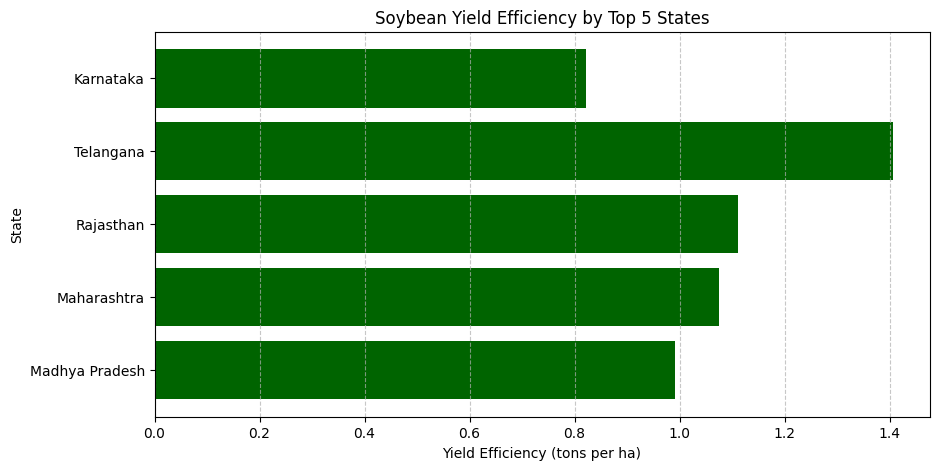

In [19]:
# Soybean Production by Top 5 States and Yield Efficiency

query = """
    SELECT State_Name,
           SUM(SOYABEAN_PRODUCTION_1000_tons) AS Total_Soybean_Production,
           SUM(SOYABEAN_PRODUCTION_1000_tons) / SUM(SOYABEAN_AREA_1000_ha) AS Yield_Efficiency
    FROM agriculture_data
    GROUP BY State_Name
    ORDER BY Total_Soybean_Production DESC
    LIMIT 5;
"""

# Fetch Data
df_soybean = pd.read_sql_query(query, conn)
print(df_soybean)


# Yield Efficiency top 5 Chart
plt.figure(figsize=(10, 5))
plt.barh(df_soybean["State_Name"], df_soybean["Yield_Efficiency"], color='darkgreen')

plt.xlabel("Yield Efficiency (tons per ha)")
plt.ylabel("State")
plt.title("Soybean Yield Efficiency by Top 5 States")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show Plot
plt.show()

       State_Name  Total_Oilseed_Production
0  Madhya Pradesh                 153594.79
1         Gujarat                 126224.01
2       Rajasthan                 122726.86
3     Maharashtra                  95567.91
4  Andhra Pradesh                  76888.09


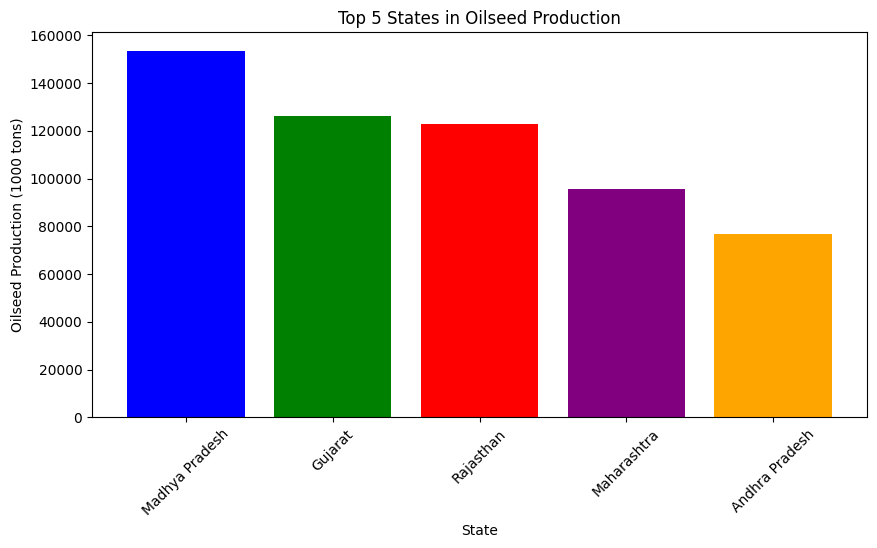

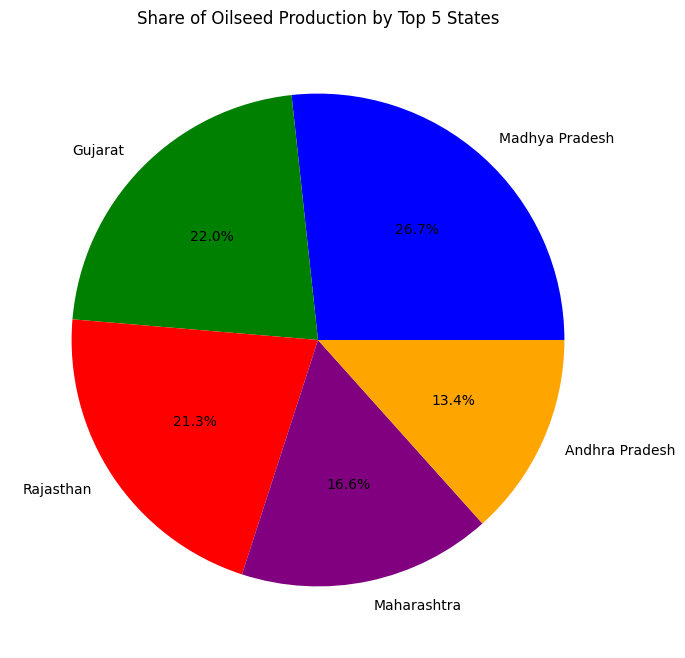

In [20]:
# Oilseed Production in 5 Major States

query = """
SELECT State_Name,
       SUM(OILSEEDS_PRODUCTION_1000_tons) AS Total_Oilseed_Production
FROM agriculture_data
GROUP BY State_Name
ORDER BY Total_Oilseed_Production DESC
LIMIT 5;
"""
df_oilseed = pd.read_sql_query(query, conn)
print(df_oilseed)

# Bar Chart
plt.figure(figsize=(10, 5))
plt.bar(df_oilseed["State_Name"], df_oilseed["Total_Oilseed_Production"], color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel("State")
plt.ylabel("Oilseed Production (1000 tons)")
plt.title("Top 5 States in Oilseed Production")
plt.xticks(rotation=45)
plt.show()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(df_oilseed["Total_Oilseed_Production"], labels=df_oilseed["State_Name"], autopct="%1.1f%%", colors=['blue', 'green', 'red', 'purple', 'orange'])
plt.title("Share of Oilseed Production by Top 5 States")
plt.show()

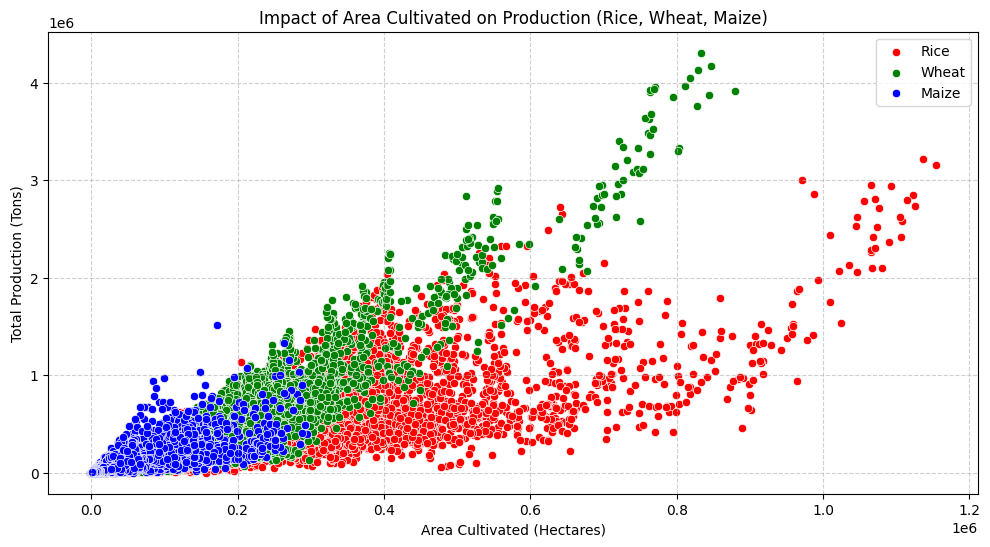

In [21]:
#Impact of Area Cultivated on Production (Rice, Wheat, Maize)

# SQL Query
query = """
    SELECT Year,
           RICE_AREA_1000_ha * 1000 AS Rice_Area,
           RICE_PRODUCTION_1000_tons * 1000 AS Rice_Production,
           WHEAT_AREA_1000_ha * 1000 AS Wheat_Area,
           WHEAT_PRODUCTION_1000_tons * 1000 AS Wheat_Production,
           MAIZE_AREA_1000_ha * 1000 AS Maize_Area,
           MAIZE_PRODUCTION_1000_tons * 1000 AS Maize_Production
    FROM agriculture_data
"""

# Fetch Data
df_area = pd.read_sql_query(query, conn)


# Scatter Plot (Impact of Area on Production)
plt.figure(figsize=(12, 6))

sns.scatterplot(x=df_area["Rice_Area"], y=df_area["Rice_Production"], color="red", label="Rice")
sns.scatterplot(x=df_area["Wheat_Area"], y=df_area["Wheat_Production"], color="green", label="Wheat")
sns.scatterplot(x=df_area["Maize_Area"], y=df_area["Maize_Production"], color="blue", label="Maize")

plt.xlabel("Area Cultivated (Hectares)")
plt.ylabel("Total Production (Tons)")
plt.title("Impact of Area Cultivated on Production (Rice, Wheat, Maize)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

# Show Plot
plt.show()

In [22]:
#Rice vs. Wheat Yield Across States

import plotly.express as px

# SQL Query
query = """
    SELECT State_Name,
           AVG(RICE_YIELD_Kg_per_ha) AS Avg_Rice_Yield,
           AVG(WHEAT_YIELD_Kg_per_ha) AS Avg_Wheat_Yield,
           SUM(RICE_PRODUCTION_1000_tons) * 1000 AS Total_Rice_Production,
           SUM(WHEAT_PRODUCTION_1000_tons) * 1000 AS Total_Wheat_Production
    FROM agriculture_data
    GROUP BY State_Name
    ORDER BY State_Name;
"""

# Fetch Data
df_yield_state = pd.read_sql_query(query, conn)


# Create Bubble Chart
fig = px.scatter(df_yield_state,
                 x="Avg_Rice_Yield",
                 y="Avg_Wheat_Yield",
                 size="Total_Rice_Production",
                 color="State_Name",
                 hover_name="State_Name",
                 text="State_Name",
                 size_max=50,
                 labels={"Avg_Rice_Yield": "Rice Yield (Kg/ha)",
                         "Avg_Wheat_Yield": "Wheat Yield (Kg/ha)"},
                 title="Rice vs. Wheat Yield Across States")

# Improve Layout
fig.update_traces(textposition='top center')
fig.update_layout(xaxis=dict(title="Rice Yield (Kg per Ha)"),
                  yaxis=dict(title="Wheat Yield (Kg per Ha)"),
                  showlegend=False)

# Show Plot
fig.show()

SQ

In [24]:
# .Year-wise Trend of Rice Production Across States (Top 3)

# SQL Query
query = """
    WITH Top_States AS (
        SELECT State_Name, SUM(RICE_PRODUCTION_1000_tons) AS Total_Rice_Production
        FROM agriculture_data
        GROUP BY State_Name
        ORDER BY Total_Rice_Production DESC
        LIMIT 3
    )
    SELECT a.Year, a.State_Name, SUM(a.RICE_PRODUCTION_1000_tons) AS Yearly_Rice_Production
    FROM agriculture_data a
    JOIN Top_States t ON a.State_Name = t.State_Name
    GROUP BY a.Year, a.State_Name
    ORDER BY a.Year, a.State_Name;
"""

# Fetch Data
df_year_rice = pd.read_sql_query(query, conn)
print(df_year_rice)

# Create Line Chart
fig = px.line(df_year_rice,
              x="Year",
              y="Yearly_Rice_Production",
              color="State_Name",
              markers=True,
              labels={"Yearly_Rice_Production": "Rice Production (1000 tons)",
                      "Year": "Year"},
              title="Year-wise Trend of Rice Production (Top 3 States)")

# Improve Layout
fig.update_traces(line=dict(width=2), marker=dict(size=8))
fig.update_layout(xaxis=dict(title="Year", tickmode="linear", dtick=1),
                  yaxis=dict(title="Rice Production (1000 tons)"),
                  legend_title="State",
                  hovermode="x unified")

# Show Plot
fig.show()

     Year     State_Name  Yearly_Rice_Production
0    1966         Punjab                  338.00
1    1966  Uttar Pradesh                 2473.50
2    1966    West Bengal                 4819.40
3    1967         Punjab                  415.00
4    1967  Uttar Pradesh                 2969.00
..    ...            ...                     ...
151  2016  Uttar Pradesh                14500.80
152  2016    West Bengal                15106.32
153  2017         Punjab                13382.00
154  2017  Uttar Pradesh                15551.39
155  2017    West Bengal                15658.94

[156 rows x 3 columns]


   Dist_Name  Yield_Increase
0   Adilabad         3754.65
1      Nadia         3405.97
2  Hyderabad         3268.42
3      Thane         2833.33
4     Kanpur         2750.47


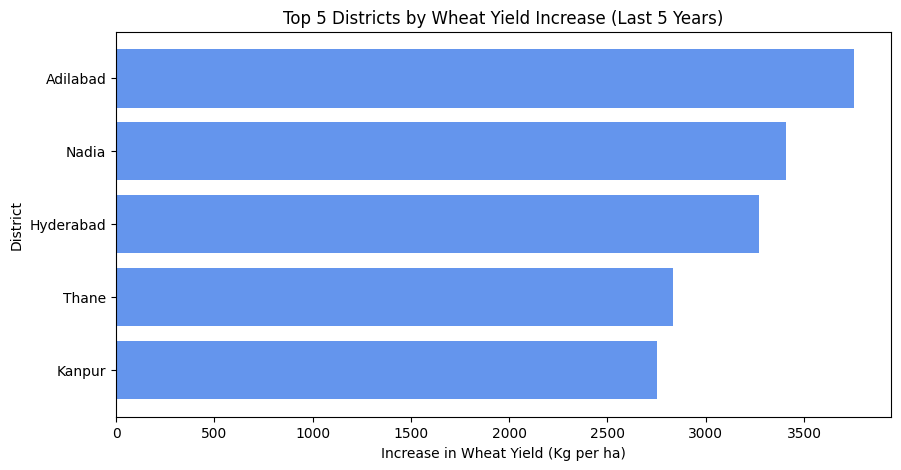

In [25]:
# Top 5 Districts by Wheat Yield Increase Over the Last 5 Years

# SQL Query
query = """
    WITH Wheat_Yield_Recent AS (
        SELECT Dist_Name, Year, WHEAT_YIELD_Kg_per_ha
        FROM agriculture_data
        WHERE Year >= (SELECT MAX(Year) - 5 FROM agriculture_data)
    ),
    Yield_Diff AS (
        SELECT Dist_Name,
               MAX(WHEAT_YIELD_Kg_per_ha) AS Latest_Yield,
               MIN(WHEAT_YIELD_Kg_per_ha) AS Old_Yield,
               (MAX(WHEAT_YIELD_Kg_per_ha) - MIN(WHEAT_YIELD_Kg_per_ha)) AS Yield_Increase
        FROM Wheat_Yield_Recent
        GROUP BY Dist_Name
    )
    SELECT Dist_Name, Yield_Increase
    FROM Yield_Diff
    ORDER BY Yield_Increase DESC
    LIMIT 5;
"""

# Fetch Data
df_wheat_top_5 = pd.read_sql_query(query, conn)
print(df_wheat_top_5)

# Bar Chart
plt.figure(figsize=(10, 5))
plt.barh(df_wheat_top_5["Dist_Name"], df_wheat_top_5["Yield_Increase"], color="cornflowerblue")
plt.xlabel("Increase in Wheat Yield (Kg per ha)")
plt.ylabel("District")
plt.title("Top 5 Districts by Wheat Yield Increase (Last 5 Years)")
plt.gca().invert_yaxis()  # Highest increase on top
plt.show()

In [26]:
#States with the Highest Growth in Oilseed Production (5-Year Growth Rate)


# Execute the query
query = """
WITH recent_production AS (
    SELECT State_Name, Year,
           SUM(OILSEEDS_PRODUCTION_1000_tons) AS Total_Production
    FROM agriculture_data
    WHERE Year IN ((SELECT MAX(Year) FROM agriculture_data) - 5, (SELECT MAX(Year) FROM agriculture_data))
    GROUP BY State_Name, Year
),
growth_calculation AS (
    SELECT r1.State_Name,
           r2.Total_Production AS Production_Recent,
           r1.Total_Production AS Production_5_Years_Ago,
           ((r2.Total_Production - r1.Total_Production) / NULLIF(r1.Total_Production, 0)) * 100 AS Growth_Rate
    FROM recent_production r1
    JOIN recent_production r2 ON r1.State_Name = r2.State_Name
    WHERE r1.Year = (SELECT MAX(Year) FROM agriculture_data) - 5
      AND r2.Year = (SELECT MAX(Year) FROM agriculture_data)
)
SELECT State_Name, Growth_Rate
FROM growth_calculation
ORDER BY Growth_Rate DESC
LIMIT 5;
"""

df_growth_oilseed = pd.read_sql_query(query, conn)

# Plotly Bar Chart
fig = px.bar(
    df_growth_oilseed, x="State_Name", y="Growth_Rate",
    title="Top 5 States with Highest Growth in Oilseed Production (Last 5 Years)",
    labels={"State_Name": "State", "Growth_Rate": "Growth Rate (%)"},
    color="Growth_Rate",
    color_continuous_scale="Viridis"
)

fig.show()

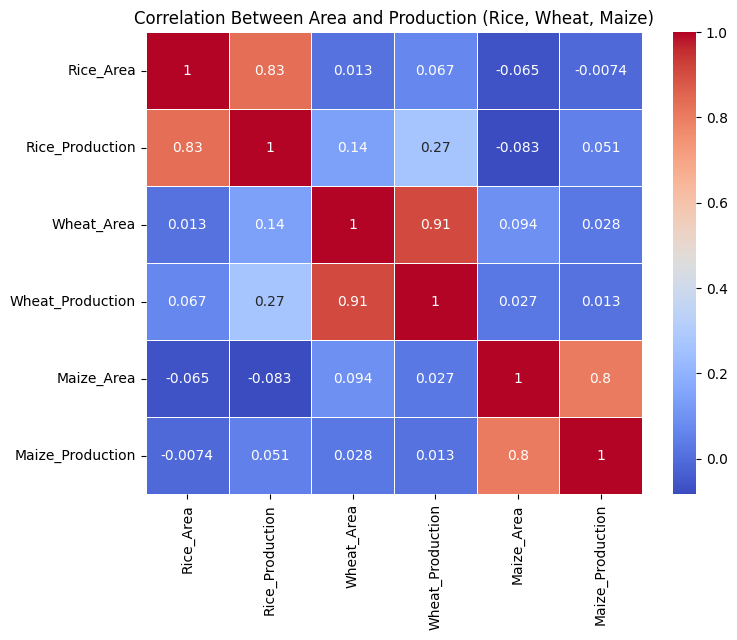

In [27]:
#District-wise Correlation Between Area and Production for Major Crops (Rice, Wheat, and Maize)


# Execute the SQL query
query = """
SELECT Dist_Name,
       RICE_AREA_1000_ha AS Rice_Area,
       RICE_PRODUCTION_1000_tons AS Rice_Production,
       WHEAT_AREA_1000_ha AS Wheat_Area,
       WHEAT_PRODUCTION_1000_tons AS Wheat_Production,
       MAIZE_AREA_1000_ha AS Maize_Area,
       MAIZE_PRODUCTION_1000_tons AS Maize_Production
FROM agriculture_data
"""
df_re_rice_wheat_maize = pd.read_sql_query(query, conn)

# Drop districts with missing values
df_re_rice_wheat_maize = df_re_rice_wheat_maize.dropna()

# Compute Correlation Matrix (excluding district names)
correlation_matrix = df_re_rice_wheat_maize.drop(columns=["Dist_Name"]).corr()

# Heatmap Visualization
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Area and Production (Rice, Wheat, Maize)")
plt.show()

In [28]:
# Execute the SQL query
query = """
SELECT Dist_Name,
       Year,  -- Include Year for multiple observations per district
       RICE_AREA_1000_ha AS Rice_Area,
       RICE_PRODUCTION_1000_tons AS Rice_Production,
       WHEAT_AREA_1000_ha AS Wheat_Area,
       WHEAT_PRODUCTION_1000_tons AS Wheat_Production,
       MAIZE_AREA_1000_ha AS Maize_Area,
       MAIZE_PRODUCTION_1000_tons AS Maize_Production
FROM agriculture_data
"""
# Fetch data
df_cor = pd.read_sql_query(query, conn)

# Drop missing values
df_cor = df_cor.dropna()

# Dictionary to store correlation matrices for each district
district_correlations = {}

# Compute correlation for each district
for district, group in df_cor.groupby("Dist_Name"):
    # Drop 'Dist_Name' & 'Year' before computing correlation
    correlation_matrix = group.drop(columns=["Dist_Name", "Year"]).corr()
    district_correlations[district] = correlation_matrix




In [29]:
for district, correlation_matrix in district_correlations.items():
    print(f"\n📍 District: {district}")

    for crop in ["Rice", "Wheat", "Maize"]:
        area_col = f"{crop}_Area"
        production_col = f"{crop}_Production"

        if area_col in correlation_matrix and production_col in correlation_matrix:
            correlation = correlation_matrix.loc[area_col, production_col]

            if correlation > 0.7:
                trend = "strong positive correlation (high impact of area on production)"
            elif correlation > 0.3:
                trend = "moderate correlation (area somewhat affects production)"
            elif correlation > -0.3:
                trend = "weak correlation (area has little impact on production)"
            else:
                trend = "negative correlation (unexpected drop in production with more area)"

            print(f"   - {crop}: {trend} (correlation: {correlation:.2f})")


# Plot heatmaps for all districts
for district, correlation_matrix in district_correlations.items():
    plt.figure(figsize=(8,6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title(f"Correlation Between Area & Production in {district}")
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [30]:
#Yearly Production Growth of Cotton in Top 5 Cotton Producing States

query = """
WITH TopCottonStates AS (
    SELECT State_Name, SUM(COTTON_PRODUCTION_1000_tons) AS Total_Production
    FROM agriculture_data
    GROUP BY State_Name
    ORDER BY Total_Production DESC
    LIMIT 5
)
SELECT a.Year, a.State_Name, a.COTTON_PRODUCTION_1000_tons
FROM agriculture_data a
JOIN TopCottonStates t ON a.State_Name = t.State_Name
ORDER BY a.Year, a.State_Name
"""

df_cotton = pd.read_sql_query(query, conn)

# Check for missing values
df_cotton.dropna(inplace=True)

df_cotton_grouped = df_cotton.groupby(["Year", "State_Name"], as_index=False).agg({"COTTON_PRODUCTION_1000_tons": "sum"})

duplicates = df_cotton[df_cotton.duplicated(subset=["Year", "State_Name"], keep=False)]
if not duplicates.empty:
    print("Duplicates found:")
    print(duplicates)


# Now pivot the table
df_pivot = df_cotton_grouped.pivot(index="Year", columns="State_Name", values="COTTON_PRODUCTION_1000_tons")


# Calculate Yearly Growth Percentage
df_growth = df_pivot.pct_change() * 100  # Converts to percentage
df_growth.fillna(0, inplace=True)  # Replace NaN with 0 for first year


# Convert to long format for easy plotting
df_growth_long = df_growth.reset_index().melt(id_vars="Year", var_name="State", value_name="Growth Rate (%)")

# Create line chart
fig = px.line(df_growth_long, x="Year", y="Growth Rate (%)", color="State",
              title="Yearly Production Growth of Cotton in Top 5 Cotton-Producing States",
              markers=True)

fig.update_layout(yaxis_title="Growth Rate (%)", xaxis_title="Year", template="plotly_dark")
fig.show()

Duplicates found:
      Year State_Name  COTTON_PRODUCTION_1000_tons
0     1966    Gujarat                        29.00
1     1966    Gujarat                         2.00
2     1966    Gujarat                         3.00
3     1966    Gujarat                        32.00
4     1966    Gujarat                        47.00
...    ...        ...                          ...
3683  2017  Telangana                       149.19
3684  2017  Telangana                       131.64
3685  2017  Telangana                        99.72
3686  2017  Telangana                       101.28
3687  2017  Telangana                       182.74

[3688 rows x 3 columns]


In [49]:
# SQL query to get the top 1 district for Groundnut production in 2020
query = """
SELECT Dist_Name,
       SUM(GROUNDNUT_PRODUCTION_1000_tons) AS Total_Groundnut_Production
FROM agriculture_data
WHERE Year = 2020
GROUP BY Dist_Name
ORDER BY Total_Groundnut_Production DESC
LIMIT 1;
"""

# Execute query
df_groundnut_2020 = pd.read_sql_query(query, conn)

# Check if DataFrame has data
if not df_groundnut_2020.empty:
    # Plotting
    plt.figure(figsize=(6, 4))
    sns.barplot(data=df_groundnut_2020, x="Total_Groundnut_Production", y="Dist_Name", palette="magma")

    # Labels and Title
    plt.xlabel("Groundnut Production (1000 tons)")
    plt.ylabel("District")
    plt.title("Top District for Groundnut Production in 2020")

    plt.show()
else:
    print("No data available for Groundnut Production in 2020.")

No data available for Groundnut Production in 2020.


    Year  Avg_Maize_Yield
0   1966         0.991161
1   1967         1.135407
2   1968         0.878532
3   1969         0.919111
4   1970         1.276873
5   1971         0.933088
6   1972         1.062376
7   1973         0.926031
8   1974         0.927738
9   1975         1.153164
10  1976         1.020999
11  1977         1.017315
12  1978         1.042528
13  1979         0.982779
14  1980         1.104413
15  1981         1.131705
16  1982         1.152588
17  1983         1.379735
18  1984         1.452928
19  1985         1.130789
20  1986         1.227950
21  1987         1.023333
22  1988         1.397802
23  1989         1.641956
24  1990         1.522946
25  1991         1.352444
26  1992         1.673417
27  1993         1.567344
28  1994         1.478725
29  1995         1.595883
30  1996         1.723818
31  1997         1.746073
32  1998         1.750603
33  1999         1.800477
34  2000         1.822224
35  2001         2.013702
36  2002         1.677322
37  2003    

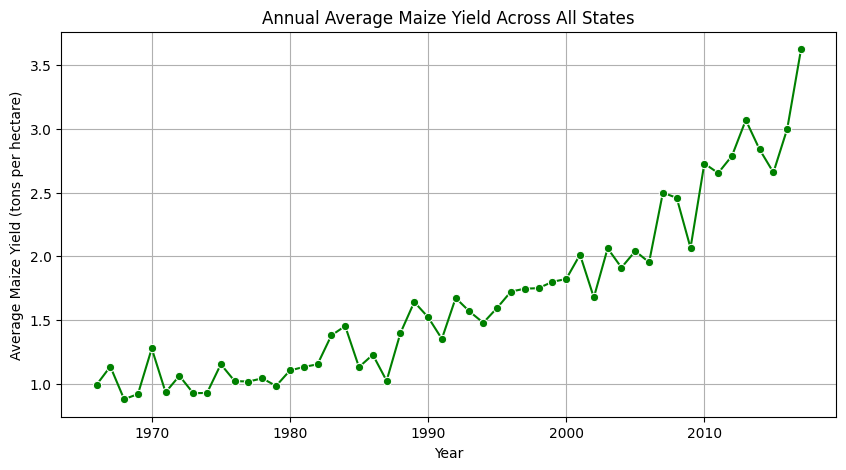

In [55]:
#Annual Average Maize Yield Across All States

query = """
SELECT Year,
       SUM(MAIZE_PRODUCTION_1000_tons) / NULLIF(SUM(MAIZE_AREA_1000_ha), 0) AS Avg_Maize_Yield
FROM agriculture_data
GROUP BY Year
ORDER BY Year;
"""

# Execute the query
df_maize_yield = pd.read_sql_query(query, conn)
print(df_maize_yield)

# Check if DataFrame has data
if not df_maize_yield.empty:
    # Plotting the trend of annual average maize yield
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=df_maize_yield, x="Year", y="Avg_Maize_Yield", marker="o", color="green")

    # Labels and Title
    plt.xlabel("Year")
    plt.ylabel("Average Maize Yield (tons per hectare)")
    plt.title("Annual Average Maize Yield Across All States")

    plt.grid(True)
    plt.show()
else:
    print("No data available for Annual Average Maize Yield.")

          State_Name  Total_Oilseed_Area
0     Madhya Pradesh           189945.92
1          Rajasthan           142433.47
2        Maharashtra           134069.16
3            Gujarat           130725.71
4          Karnataka            92527.23
5     Andhra Pradesh            87223.49
6         Tamil Nadu            56225.64
7      Uttar Pradesh            43047.07
8             Orissa            39682.05
9          Telangana            35293.43
10            Kerala            34424.94
11           Haryana            21465.54
12       West Bengal            20300.76
13      Chhattisgarh            17267.08
14             Assam            14176.64
15            Punjab             8697.93
16             Bihar             5547.29
17         Jharkhand             2832.29
18       Uttarakhand             1026.53
19  Himachal Pradesh              809.25


<ipython-input-54-bb0a06c94e24>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




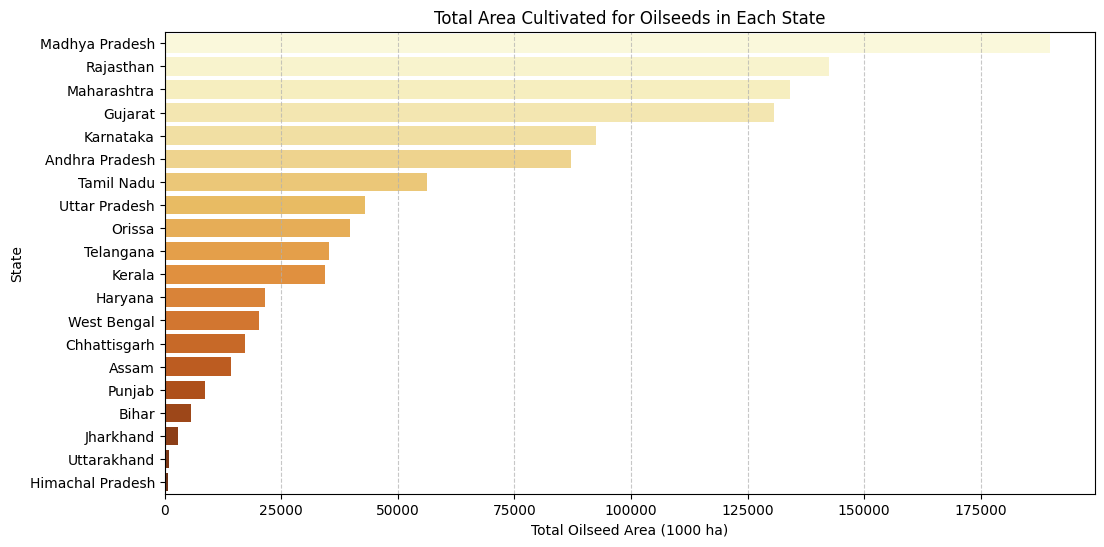

In [54]:
# Total Area Cultivated for Oilseeds in Each State

query = """
SELECT State_Name,
       SUM(OILSEEDS_AREA_1000_ha) AS Total_Oilseed_Area
FROM agriculture_data
GROUP BY State_Name
ORDER BY Total_Oilseed_Area DESC;
"""

# Execute the query
df_oilseed_area = pd.read_sql_query(query, conn)
print(df_oilseed_area)

# Check if DataFrame has data
if not df_oilseed_area.empty:
    # Plot the data as a horizontal bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_oilseed_area, x="Total_Oilseed_Area", y="State_Name", palette="YlOrBr")

    # Labels and Title
    plt.xlabel("Total Oilseed Area (1000 ha)")
    plt.ylabel("State")
    plt.title("Total Area Cultivated for Oilseeds in Each State")

    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.show()
else:
    print("No data available for Oilseed Cultivation Area.")

<ipython-input-56-db4d02a6f5d4>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




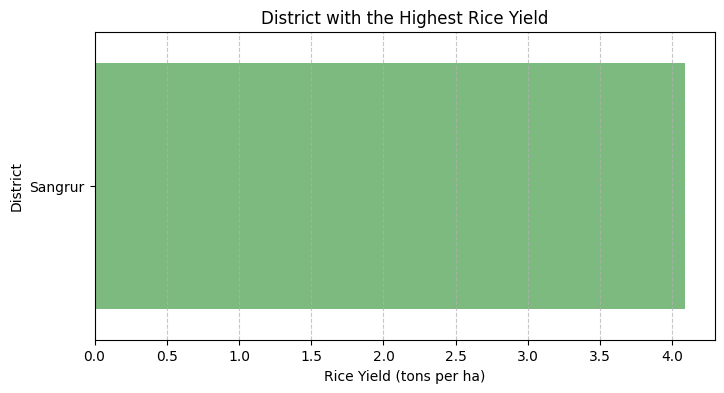

Highest Rice Yield District: Sangrur (4.09 tons/ha)


In [56]:
# Districts with the Highest Rice Yield


# SQL Query to get the district with the highest rice yield
query = """
SELECT Dist_Name,
       (SUM(RICE_PRODUCTION_1000_tons) / NULLIF(SUM(RICE_AREA_1000_ha), 0)) AS Rice_Yield
FROM agriculture_data
GROUP BY Dist_Name
ORDER BY Rice_Yield DESC
LIMIT 1;
"""

# Execute the query
df_rice_yield = pd.read_sql_query(query, conn)

# Check if DataFrame has data
if not df_rice_yield.empty:
    # Plot the data
    plt.figure(figsize=(8, 4))
    sns.barplot(data=df_rice_yield, x="Rice_Yield", y="Dist_Name", palette="Greens")

    # Labels and Title
    plt.xlabel("Rice Yield (tons per ha)")
    plt.ylabel("District")
    plt.title("District with the Highest Rice Yield")

    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.show()

    # Print the highest yield district
    print(f"Highest Rice Yield District: {df_rice_yield.iloc[0]['Dist_Name']} ({df_rice_yield.iloc[0]['Rice_Yield']:.2f} tons/ha)")




In [57]:
# Compare the Production of Wheat and Rice for the Top 5 States Over 10 Years
query = """
WITH Top5States AS (
    SELECT State_Name,
           SUM(WHEAT_PRODUCTION_1000_tons) AS Total_Wheat_Production,
           SUM(RICE_PRODUCTION_1000_tons) AS Total_Rice_Production
    FROM agriculture_data
    WHERE Year BETWEEN strftime('%Y', 'now') - 10 AND strftime('%Y', 'now')  -- Last 10 years
    GROUP BY State_Name
    ORDER BY Total_Wheat_Production + Total_Rice_Production DESC
    LIMIT 5
)

SELECT a.Year, a.State_Name,
       a.WHEAT_PRODUCTION_1000_tons AS Wheat_Production,
       a.RICE_PRODUCTION_1000_tons AS Rice_Production
FROM agriculture_data a
JOIN Top5States t ON a.State_Name = t.State_Name
WHERE a.Year BETWEEN strftime('%Y', 'now') - 10 AND strftime('%Y', 'now')
ORDER BY a.Year, a.State_Name;

"""
# Execute the query
df_wheat_rice = pd.read_sql_query(query, conn)

# Check if data is available
if not df_wheat_rice.empty:
    # Convert 'Year' to integer for sorting
    df_wheat_rice["Year"] = df_wheat_rice["Year"].astype(int)

    # Melt the data for visualization
    df_melted = df_wheat_rice.melt(id_vars=["Year", "State_Name"],
                                   value_vars=["Wheat_Production", "Rice_Production"],
                                   var_name="Crop", value_name="Production")

    # Create an interactive line plot
    fig = px.line(df_melted, x="Year", y="Production", color="State_Name",
                  line_dash="Crop", markers=True,
                  title="Wheat vs Rice Production in Top 5 States (Last 10 Years)",
                  labels={"Production": "Production (1000 tons)", "Year": "Year"},
                  template="plotly_dark")

    fig.show()

else:
    print("No data available for Wheat and Rice Production Comparison.")